## Logistic regression: Another example using Python 3 with [numpy](http://www.numpy.org/) and [matplotlib](http://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Only necessary if you have a HiDPI display
%config InlineBackend.figure_format = 'retina'

Below are the vectorized forms of the logistic regression hypothesis $h_\theta(X)$, cost function $J(\theta)$, and the gradient descent algorithm. Logistic regression aims to classify samples based on a categorical or discrete output variable $y \in \{0, 1\}$. Thus the hypothesis maps our $\theta^T X$ to a number between 0 and 1. This value is treated as the probability that the sample has the output value 1. Usually a decision boundary of 0.5 is used, thus when $h_\theta(X) \geq 0.5 \to y = 1$ and $h_\theta(X) \lt 0.5 \to y = 0$.

Hypothesis:

$0 \leq h_\theta(X) \leq 1$

$h_\theta(X) = g(\theta^T X)$

$g(z) = \frac{1}{1 + e^{-z}}$

Cost function:

$J(\theta) = -\frac{1}{m}(log(g(X\theta))^Ty + log(1 - g(X\theta))^T(1 - y))$

Gradient descent:

$\theta := \theta - \frac{\alpha}{m}X^T(g(X\theta) - \vec{y})$

Where $X$ is the feature matrix containing $m$ examples, $\theta$ is a column vector of model parameters, $\vec{y}$ is the column vector of outputs, and $\alpha$ is the learning rate.

Define functions for each equation and algorithm.

In [76]:
def sigmoid(z):
    """Apply the sigmoid function element-wise to the
    input array z."""
    return 1 / (1 + np.exp(-z))

def calculate_cost(theta, X, y):
    m = X.shape[0]
    J = - (1 / m) * (np.log(sigmoid(X * theta)).T * y + np.log(1 - sigmoid(X * theta)).T * (1 - y))
    return J

def gradient_descent(initial_theta, X, y, alpha=0.1, maxiter=100, tol=0.1, return_costs=False):
    m = X.shape[0]
    i = 0
    theta = initial_theta
    costs = []
    while i < maxiter:
        theta = theta - (alpha / m) * X.T * (sigmoid(X * theta) - y)
        cost = calculate_cost(theta, X, y)
        costs.append(float(cost))
        if cost <= tol:
            if return_costs:
                return theta, costs
            else:
                return theta
        i = i + 1
    if return_costs:
        return theta, costs
    else:
        return theta

Next, we define initial guess of $\theta$ (all zeros), X (based on two features called $x_1$ and $x_2$ here), and $y$.

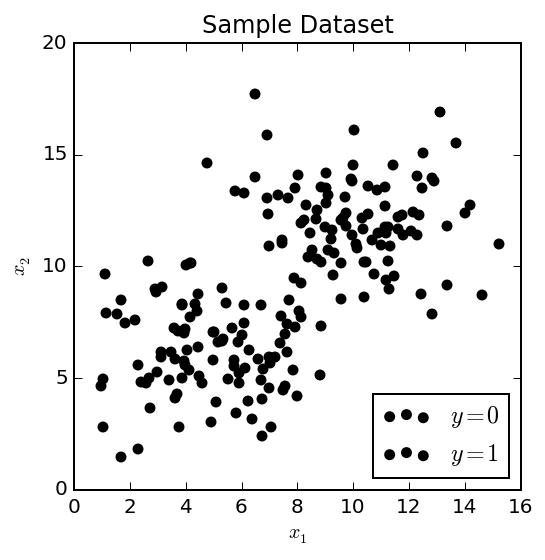

In [167]:
n_pts = 100

m = 2

bias = np.ones(n_pts)

Xa = np.array([bias,
               np.random.normal(10, 2, n_pts),
               np.random.normal(12, 2, n_pts)])
Xb = np.array([bias,
               np.random.normal(5, 2, n_pts),
               np.random.normal(6, 2, n_pts)])

initial_theta = np.matrix([np.zeros(m + 1)]).T
X = np.append(Xa, Xb, axis=1).T
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:n_pts,1], X[:n_pts,2], color='k',
          label='$y = 0$')
ax.scatter(X[n_pts:,1], X[n_pts:,2], color='k',
          label='$y = 1$')
ax.set_title('Sample Dataset')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc=4)

In [168]:
theta, costs = gradient_descent(initial_theta, X, y, alpha=0.01, maxiter=10000, return_costs=True)

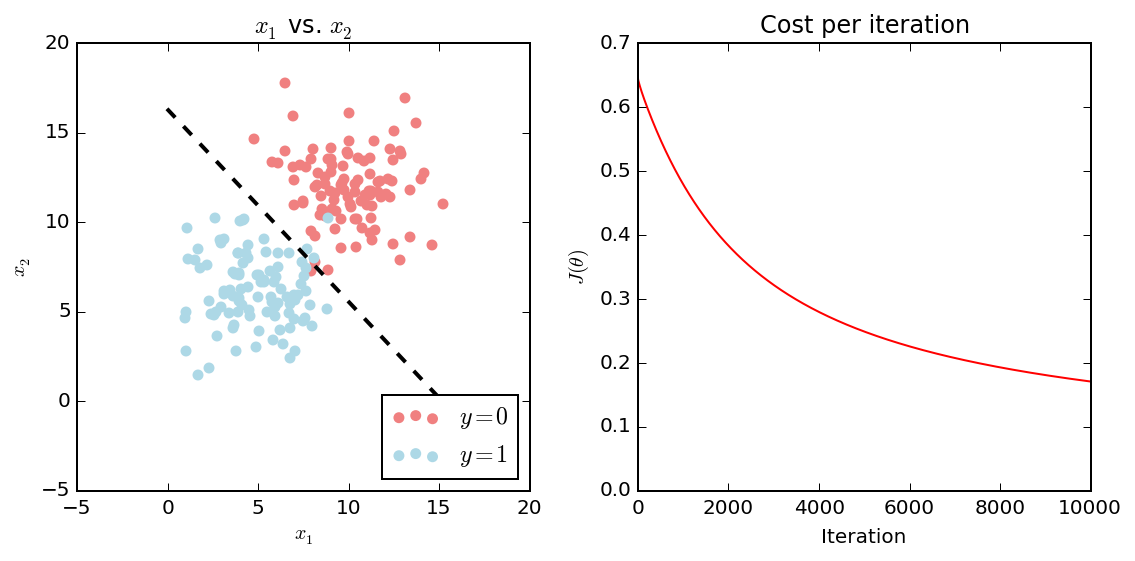

In [169]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

x1 = np.array([X[:,1].min()-1, X[:,1].max()+1])
x2 = - theta.item(0) / theta.item(2) + x1 * (- theta.item(1) / theta.item(2))

# Plot decision boundary
ax[0].plot(x1, x2, color='k', ls='--', lw=2)

ax[0].scatter(X[:int(n_pts),1], X[:int(n_pts),2], color='lightcoral', label='$y = 0$')
ax[0].scatter(X[int(n_pts):,1], X[int(n_pts):,2], color='lightblue', label='$y = 1$')
ax[0].set_title('$x_1$ vs. $x_2$')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].legend(loc=4)

ax[1].plot(costs, color='r')
ax[1].set_ylim(0,ax[1].get_ylim()[1])
ax[1].set_title('Cost per iteration')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel(r'$J(\theta)$')

fig.tight_layout()